<p style='text-align:center'>
PSY 394U <b>Methods for fMRI</b>, Fall 2019


<img style='width: 300px; padding: 0px;' src='https://github.com/sathayas/JupyterfMRIFall2019/blob/master/Images/Placebo_Left.png?raw=true' alt='brain blobs'/>

</p>

<p style='text-align:center; font-size:40px; margin-bottom: 30px;'><b> Machine learning: brief introduction </b></p>

<p style='text-align:center; font-size:18px; margin-bottom: 32px;'><b> November 11, 2019 </b></p>

<hr style='height:5px;border:none' />

# 0. What is machine learning?
<hr style="height:1px;border:none" />

The main goal of **machine learning** is to build (*or to* ***learn***) a predictive model based on available data. Although machine learning is built upon statistical concept, it is different from traditional statistics, where inference and estimation are performed based on known statistical distributions. 

Machine learning is a data-driven approach. Some machine learning methods may work well for some data, but may not work well for other types of data. There is no machine learning method that works well for any data. People usually have to choose a machine learning method that works well for their data (often via trails and errors).

## Supervised v.s. unsupervised learning

In machine learning, a data set consists of **features**, or variables used to make predictions. A data set may also contain the **labels**, the true group assignments or classes. The goal of **supervised learning** is to train a model to predict labels based on the available features. **Classification**, or assignment of observations into distinct categories, is a popular example of supervised learning. 

Supervised learning models are often constructed -- *learned or* ***trained*** -- using a portion of a data set, known as the **training data**. The resulting model is validated using the remaining portion of the data set known as the **testing data**. This framework is necessary to avoid **overfitting**, where the model can predict the training data very accurately but unable to predict on new data sets.

Unlike supervised learning, true labels may not be available for **unsupervised learning**. The goal of unsupervised learning is to find patterns in the data (often without labels). **Clustering**, or finding natural grouping of observations with similar features, is one example of unsupervised learning. **Dimension reduction**, or describing a large number of features with a small number of summary features, is another 

## Glossary of machine learning

Just FYI, there is a glossary of machine learning terms available from Google's [machine learning tutorial](https://developers.google.com/machine-learning/glossary). 


# 1. Simple clustering example
<hr style="height:1px;border:none" />

Now let's take a look at a simple example of clustering. The goal of clustering is to identify grouping of observations based on similarities in features. In this example, we will use **K-means** clustering method.

## Iris data
This is a famous data set with the lengths and widths of the petal and the sepal of 3 different types of irises (Setosa, Versicolour, and Virginica). This is one of example data sets available in **Scikit-learn** (or **`sklearn`**, a popular machine learning library in Python). The data is stored in a 2D array of 150 rows (150 irises) and 4 columns of ***features*** (a.k.a., variables) (sepal length, sepal width, petal length and petal width).

<img style="width: 300px; padding: 0px;" src="https://github.com/sathayas/JupyterfMRIFall2019/blob/master/Images/PCA_Iris.jpg?raw=true" alt="Iris with labels"/>
<p style="text-align:center; font-size:10px; margin-top: 0px;">Source: https://www.math.umd.edu/~petersd/666/html/iris_pca.html </p>

Let's take a look at the data set. First, we generate scatter plots. 

[`<IrisCluster.py>`](https://github.com/sathayas/fMRIClassFall2019/blob/master/MachineLearning/IrisCluster.py)

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import datasets
from sklearn.preprocessing import StandardScaler


# Loading the iris data
iris = datasets.load_iris()
X = iris.data    # Data
y = iris.target  # Target i.e., true clusters
varNames = iris.feature_names  # variable names
targetNames = iris.target_names  # names of irises
nVar = X.shape[1]  # number of features


In [ ]:
%matplotlib inline

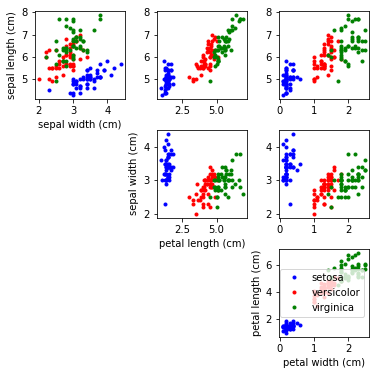

In [15]:
# plotting the data
plt.figure(figsize=[6, 6])

# generating subplots
y_set = list(set(y))
c_points = ['b.','r.','g.']
for iRow in range(nVar-1):  # subplot row index
    for iCol in range(iRow+1, nVar):  # subplot column index
        indPlot = (nVar-1)*iRow + iCol
        plt.subplot(nVar-1, nVar-1, indPlot)
        for iIris in y_set:
            plt.plot(X[y==iIris,iCol], X[y==iIris,iRow],
                     c_points[iIris], label=targetNames[iIris])
        if iCol==iRow+1:
            plt.xlabel(varNames[iCol])
            plt.ylabel(varNames[iRow])
        if iRow==(nVar-2) and iCol==(nVar-1):
            plt.legend()

# adjusting the space between subplots
plt.subplots_adjust(wspace=0.35, hspace=0.35)
plt.show()

## Clustering
For this example, we use the **K-means clustering** method. The K-means clustering splits the data into **K** clusters of similar sizes. This algorithm starts by choosing **K** centroids in the feature space, defining the centers of **K** clusters. Then it assigns each observation to a cluster by minimizing the distance between the observation and a centroid. 

K-means clustering is available in **`sklearn.cluster`** as a transformation object **`KMeans`**. Here, the number of clusters **`n_clusters`** is a *required* parameter. We can use the **`.fit()`** method to fit the data, and cluster assignments can be found as the attribute **`.labels_`**. The coordinates for the centroids can be found as the attribute **`.cluster_centers_`**. 

In [6]:
# K-means clustering
numClus = 3  # number of clusters
km = KMeans(n_clusters=numClus)  # defining the clustering object
km.fit(X)  # actually fitting the data
y_clus = km.labels_   # clustering info resulting from K-means
y_cent = km.cluster_centers_  # centroid coordinates


Now, let's see how well the K-means algorithm worked.

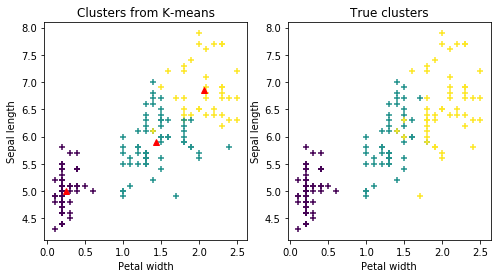

In [7]:
### plotting the clusters
plt.figure(figsize=[8,4])
# First, results from K-means
plt.subplot(121)
plt.scatter(X[:,3],X[:,0],c=y_clus,marker='+')
plt.plot(y_cent[:,3],y_cent[:,0],'r^')  # Ploting centroids
plt.xlabel('Petal width')
plt.ylabel('Sepal length')
plt.title('Clusters from K-means')

# As a comparison, the true clusters
plt.subplot(122)
plt.scatter(X[:,3],X[:,0],c=y,marker='+')
plt.xlabel('Petal width')
plt.ylabel('Sepal length')
plt.title('True clusters')

plt.show()


The red triangles indicate the centroids.

# 2. Normalizing data
<hr style="height:1px;border:none" />

In the iris data, you may notice that scales are somewhat different between different features.

[`<IrisClusterNorm.py>`](https://github.com/sathayas/fMRIClassFall2019/blob/master/MachineLearning/IrisClusterNorm.py)

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import datasets
from sklearn.preprocessing import StandardScaler


# Loading the iris data
iris = datasets.load_iris()
X_raw = iris.data    # Data
y = iris.target  # Target i.e., true clusters
varNames = iris.feature_names  # variable names
targetNames = iris.target_names  # names of irises
nVar = X.shape[1]  # number of features


# characteristics of features
pd.DataFrame(X_raw, columns=varNames).describe()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


You see that means and SDs are quite different. If features have different magnitudes, then the ones with a large magnitude tend to dominate the outcome. Thus, if features are in different scales, it is a good idea to **normalize** (or **standardize**) the features. This is done by subtracting the mean from each feature, and dividing by its SD. This results in features with mean approximately 0 and SD approximately 1. 

To do so, we can use a transformation object **`StandardScaler`** available in **`sklearn.preprocessing`**.

In [19]:
# standardizing the features
irisNorm = StandardScaler().fit(X_raw)  # learning standardization
X = irisNorm.transform(X_raw)  # transforming the raw features

The first line defines the standardization object named **`irisNorm`**. It learns standardization from the raw features in **`X_raw`** with the **`.fit()`** method. Then the resulting transformation object is used to actually transform the raw features `X_raw` with the **`.transform()`** method. Let's examine the mean and SD of normalized features.

In [20]:
# characteristics of normalized features
pd.DataFrame(X, columns=varNames).describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,1.500000e+02,1.500000e+02,1.500000e+02,1.500000e+02
mean,-1.468455e-15,-1.823726e-15,-1.610564e-15,-9.473903e-16
std,1.003350e+00,1.003350e+00,1.003350e+00,1.003350e+00
min,-1.870024e+00,-2.433947e+00,-1.567576e+00,-1.447076e+00
25%,-9.006812e-01,-5.923730e-01,-1.226552e+00,-1.183812e+00
50%,-5.250608e-02,-1.319795e-01,3.364776e-01,1.325097e-01
75%,6.745011e-01,5.586108e-01,7.627583e-01,7.906707e-01
max,2.492019e+00,3.090775e+00,1.785832e+00,1.712096e+00


As you can see, the means and SDs are comparable among the features. The normalization transformation only changes the scale and center the data; thus it doesn't change the relative relationships among features. When we plot the features, the plots seem very similar to our earlier plots. 

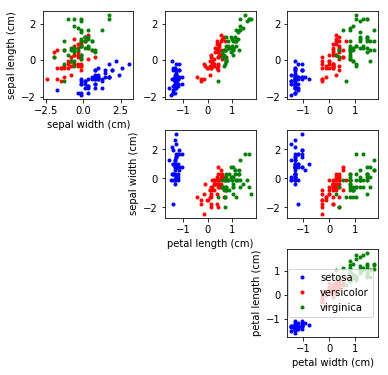

In [21]:
# plotting the data
plt.figure(figsize=[6, 6])

# generating subplots
y_set = list(set(y))
c_points = ['b.','r.','g.']
for iRow in range(nVar-1):  # subplot row index
    for iCol in range(iRow+1, nVar):  # subplot column index
        indPlot = (nVar-1)*iRow + iCol
        plt.subplot(nVar-1, nVar-1, indPlot)
        for iIris in y_set:
            plt.plot(X[y==iIris,iCol], X[y==iIris,iRow],
                     c_points[iIris], label=targetNames[iIris])
        if iCol==iRow+1:
            plt.xlabel(varNames[iCol])
            plt.ylabel(varNames[iRow])
        if iRow==(nVar-2) and iCol==(nVar-1):
            plt.legend()

# adjusting the space between subplots
plt.subplots_adjust(wspace=0.35, hspace=0.35)
plt.show()

Now, let's perform K-means clustering again on the normalized data. 

In [22]:
# K-means clustering
numClus = 3  # number of clusters
km = KMeans(n_clusters=numClus)  # defining the clustering object
km.fit(X)  # actually fitting the data
y_clus = km.labels_   # clustering info resulting from K-means
y_cent = km.cluster_centers_  # centroid coordinates

Visualizing the resulting clusters.

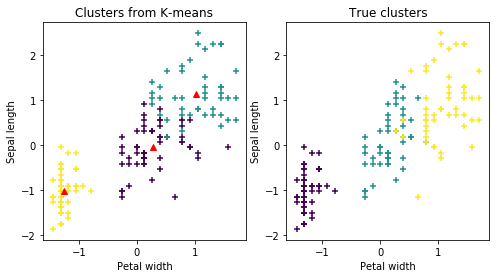

In [23]:
### plotting the clusters
plt.figure(figsize=[8,4])
# First, results from K-means
plt.subplot(121)
plt.scatter(X[:,3],X[:,0],c=y_clus,marker='+')
plt.plot(y_cent[:,3],y_cent[:,0],'r^')  # Ploting centroids
plt.xlabel('Petal width')
plt.ylabel('Sepal length')
plt.title('Clusters from K-means')

# As a comparison, the true clusters
plt.subplot(122)
plt.scatter(X[:,3],X[:,0],c=y,marker='+')
plt.xlabel('Petal width')
plt.ylabel('Sepal length')
plt.title('True clusters')

plt.show()

# 3. Evaluating clustering performance
<hr style="height:1px;border:none" />

In a rare circumstance in which you happen to have the information for the true clusters, then you can evaluate how accurate / inaccurate your clustering algorithm results are. A challenge here is that clusters may not be labeled the same in the target and clustering algorithm outcomes. For example, the *Setosa* cluster may be labeled with 0s in the target, but it may be labeled with 1s in the clustering algorithm results. Luckily, there are a number of metrics that can still evaluate the performance of clustering despite the difference in cluster labels. Here are two of those:

  * **Adjusted Rand index (ARI)**:
      * It summarizes the similarity between the cluster labels. 
      * Range: [-1, 1]. 
          * A negative ARI indicates a very bad match (independent labelings). 
          * An ARI close to 1 indicates highly similar clusters. 
          * ARI=1 indicates the perfect match.
  * **Adjusted mutual information (AMI)**:
      * It summarizes the agreement between the cluster labels. 
      * Range: [0, 1]. 
          * An AMI close to 0 indicates a very bad match (independent labelings). 
          * An AMI close to 1 indicates highly similar clusters. 
          * AMI=1 indicates the perfect match.

## Example
Let's compare the iris clustering results (without and with normalization) to the true cluster labels.

[`<ClusterEvalMetrics.py>`](https://github.com/sathayas/fMRIClassFall2019/blob/master/MachineLearning/ClusterEvalMetrics.py)

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score


# Loading the iris data
iris = datasets.load_iris()
X_raw = iris.data    # Data
y = iris.target  # Target i.e., true clusters
varNames = iris.feature_names  # variable names
targetNames = iris.target_names  # names of irises
nVar = X.shape[1]  # number of features

# standardizing the features
irisNorm = StandardScaler().fit(X_raw)  # learning standardization
X = irisNorm.transform(X_raw)  # transforming the raw features



# K-means clustering, raw data
numClus = 3  # number of clusters
kmRaw = KMeans(n_clusters=numClus)  # defining the clustering object
kmRaw.fit(X_raw)  # actually fitting the data
yRaw_clus = kmRaw.labels_   # clustering info resulting from K-means


# K-means clustering, normalized data
kmNorm = KMeans(n_clusters=numClus)  # defining the clustering object
kmNorm.fit(X)  # actually fitting the data
yNorm_clus = kmNorm.labels_   # clustering info resulting from K-means

Now ARI.

In [28]:
# ARI
print('ARI (raw)=  %7.4f' % adjusted_rand_score(y, yRaw_clus))
print('ARI (norm)=  %7.4f' % adjusted_rand_score(y, yNorm_clus))

ARI (raw)=   0.7302
ARI (norm)=   0.6201


Looks like clustering performed poorly on the normalized data. Now AMI.

In [29]:
# AMI
print('AMI (raw)=  %7.4f' % adjusted_mutual_info_score(y, yRaw_clus))
print('AMI (norm)=  %7.4f' % adjusted_mutual_info_score(y, yNorm_clus))

AMI (raw)=   0.7484
AMI (norm)=   0.6549


/usr/local/lib/python3.5/dist-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


# 4. Number of clusters
<hr style="height:1px;border:none" />

Many clustering methods often requires the number of clusters as the required parameter. However, *we don't always know how many clusters are in our data.* If we don't know the number of clusters, then we estimate the number of clusters from the data before clustering.

## Data
The data set for this example, **`wiscsem.txt`** consists of the Weschler Intelligence Scale for Children (WISC) of 175 children. There are 11 features in this data set.

 * `info`: Information
 * `comp`: Comprehension
 * `arith`: Arithmetic
 * `simil`: Similarities
 * `vocab`: Vocabulary
 * `digit`: Digit Span
 * `pictcomp`: Picture Completion
 * `parang`: Paragraph Arrangement
 * `block`: Block Design
 * `object`: Object Assembly
 * `coding`: Coding
 
<p style="text-align:center; font-size:10px; margin-top: 12px; margin-bottom: 12px;"> 
Source: Tabachnick & Fidell, <i>Using Multivariate Statistics</i>, 6th Ed. Pearson. <a href='http://media.pearsoncmg.com/ab/ab_tabachnick_multistats_6/datafiles/ASCII/wiscsem.dat'> Link to the original data</a> </p>

We are interested in seeing if there are any clusters of children with similar WISC outcomes. 

To do so, let's load the data first.

[`<WiscCluster.py>`](https://github.com/sathayas/fMRIClassFall2019/blob/master/MachineLearning/WiscCluster.py)

In [32]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# loadin the data
wiscData = pd.read_csv(os.path.join('DataML','wiscsem.txt'), sep='\t')
wiscFeatures = np.array(wiscData.iloc[:,2:13])
featureNames = np.array(wiscData.columns[2:13])

## Scree plot
One way we can determine the number of clusters is to plot the *sum of squared distances from cluster centroids (i.e., how far observations are from the centrolids)*, also known as the **inertia**. We can get the inertia by the attribute **`.inertia_`** of the clustering object. 

We run the K-means algorithm with different numbers of clusters, and calculate the corresponding inertiae. Then we plot the inertiae against the number of clusters. The inertia decreases as the number of clusters increases. However, there is an *elbow* in this plot where the rate of decrease slows down. The elbow is the point of compromise; adding more clusters does not decrease the inertia dramatically. Just FYI, this type of plot is known as a **scree plot**. It is commonly used in multivariate statistics and machine learning to determine the number of variables / factors / features to be used in an analysis. 

In this particular example, we calculate the inertia up to 20 clusters.

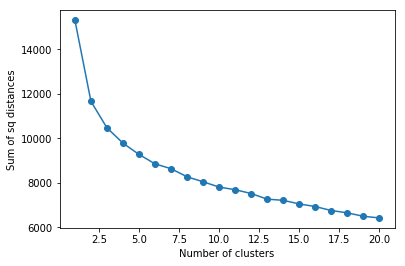

In [33]:
# determinging the number of clusters (up to 20 clusters)
SSE = []
for iClus in range(1,21):
    # K-means clustering
    km = KMeans(n_clusters=iClus)  # K-means with a given number of clusters
    km.fit(wiscFeatures)  # fitting the principal components
    SSE.append(km.inertia_) # recording the sum of square distances

# plotting the sum of square distance
plt.plot(np.arange(1,21),SSE,marker = "o")
plt.xlabel('Number of clusters')
plt.ylabel('Sum of sq distances')
plt.show()

The selection of the elbow location is somewhat subjective. In this example, 3 clusters seem reasonable for this data set. So we will re-run K-means with 3 clusters.

## Clustering and results

In [34]:
## We will go with 3 clusters
# K-means clustering again
km = KMeans(n_clusters=3)
km.fit(wiscFeatures)  # fitting the principal components
y_clus = km.labels_   # clustering info resulting from K-means

Let's examine the resulting clusters by plotting some of the features with the cluster information.

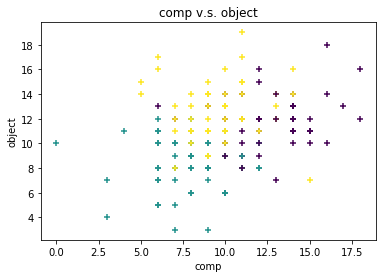

In [48]:
### plotting the clusters
# with two of the features
xFeature = 1 # index for the feature on the x-axis
yFeature = 9 # index for the feature on the y-axis
plt.scatter(wiscFeatures[:,xFeature],
            wiscFeatures[:,yFeature],c=y_clus,marker='+')
plt.xlabel(featureNames[xFeature])
plt.ylabel(featureNames[yFeature])
plt.title(featureNames[xFeature] + ' v.s. ' + featureNames[yFeature])
plt.show()


# 5. Worked example: dynamic connectivity
<hr style="height:1px;border:none" />

Now let's see how clustering can be useful in fMRI context. We will examine resting-state fMRI data, a type of fMRI data acquired while subjects *rested* inside an MRI scanner. This type of data have been widely used in studying functional connectivity, or analysis of which brain areas temporally correlate with each other.

## Data

The data is a resting-state fMRI data set from a subject in the 1000 Functional Connectomes Project (1000FCP). The raw fMRI data was pre-processed using a pipeline specifically designed for resting-state fMRI data (covered in my brain connectivity class). From the preprocessed fMRI data, mean ROI time series data were extracted with Craddock's Rt 2-level atlas with 188 ROIs (or regions of interest) covering the cerebrum.

<img style="width: 105px; padding: 0px;" src="https://github.com/sathayas/JupyterfMRIFall2019/blob/master/Images/Atlas_Example.png?raw=true" alt="Atlas example"/>
<p style="text-align:center; font-size:10px; margin-top: 0px;"> Atlas example </p>


From the extract fMRI time series on 188 ROIs, dynamic connectivity was determined by calculating a series of correlation matrices between 188 ROIs (or nodes). In particular, time series data in a sliding window of 100s (or 45 TRs) is used to calculate a correlation matrix for each window. There are 167 windows in this time series. *This resulted in a series of 167 correlation matrices with size 188 x 188.*  

The series of correlation matrices (**`Leiden_sub39335_Rt2_K200_Rmat.npz`**) is found in the **`DataML`** directory.

[`<RestingStatefMRI.py>`](https://github.com/sathayas/fMRIClassFall2019/blob/master/MachineLearning/RestingStatefMRI.py)

In [51]:
import os
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans


##### Loading the data
infile = np.load(os.path.join('DataML',
                              'Leiden_sub39335_Rt2_K200_Rmat.npz'))
Rmat = infile['Rmat']
nodes = infile['nodes']
xyz = infile['xyz']


Here is an example of the correlation matrices.

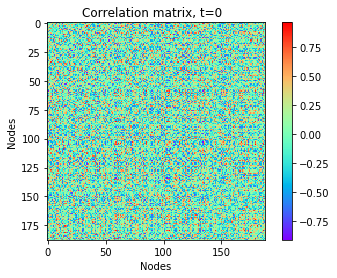

In [54]:
##### Examples of correlation matrices
indTime = 0
plt.imshow(Rmat[indTime,:,:], cmap=plt.cm.rainbow)
plt.title('Correlation matrix, t=%-3d' % indTime)
plt.xlabel('Nodes')
plt.ylabel('Nodes')
plt.colorbar()

plt.show()

## Brain connectivity is dynamic
From the series of correlation matrices, we form a functional connectivity network at each time point. For details on how a functional connectivity network is formed, please refer to my brain connectivity class. The resulting networks change over time, suggesting that so-called resting-state is not static; rather changes over time. As a demonstration, we see local and global efficiencies at each node over time. These metrics describe the ease of communication with neighboring nodes (local efficiency) and any nodes in the network (global efficiency) originating from a particular node. We plot efficiency metrics because it is hard to plot correlation matrices over time!

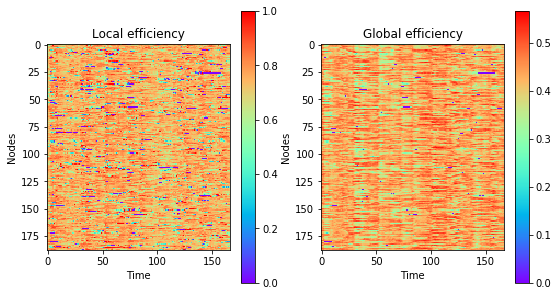

In [55]:
##### loading the efficiency metrics that have been pre-calculated
f = np.load(os.path.join('DataML',
                         'Leiden_sub39335_Rt2_K200_Efficiency.npz'))
ElocMat = f['ElocMat']
EglobMat = f['EglobMat']


##### plotting efficiency over time
plt.figure(figsize=[9,5])
plt.subplot(121)
plt.imshow(ElocMat, cmap=plt.cm.rainbow)
plt.title('Local efficiency')
plt.xlabel('Time')
plt.ylabel('Nodes')
plt.colorbar()

plt.subplot(122)
plt.imshow(EglobMat, cmap=plt.cm.rainbow)
plt.title('Global efficiency')
plt.xlabel('Time')
plt.ylabel('Nodes')
plt.colorbar()

plt.show()

Here, rows represent different nodes, and columns represent time. As you can see, there are some time points where efficiencies change dramatically (manifesting as a vertical *edge*, more apparent in global efficiency).

## Brain states

So, there seems to be system-wide changes occurring at different points during this experiment. In fact, so-called resting-state is made up of distinct states with similar connectivity patters. These states are discrete, and transitions from one state to another in a short period of time.

We can identify different brain states by K-means clustering. In particular, we ***cluster time points*** into different clusters of similar connectivity patterns. In other words, correlation coefficients are features, and time points are observations to be clustered. To do so, we re-organize the correlation matrix at each time point into a single vector, and use them as features in K-means clustering.

In [60]:
##### Converting correlation matrices to vectors
nNodes = Rmat.shape[-1]
nTime = Rmat.shape[0]
indR = np.triu_indices(nNodes,1) # indices for the upper triangle of R
# initializing the data array, rows = time, cols = correlation
Rdata = np.zeros((nTime,len(indR[0])))
for iTime in range(nTime):
    R = Rmat[iTime,:,:]
    Rdata[iTime,:] = R[indR]

Just FYI, at each time point there are 17578 correlation coefficients; that's why we cannot plot correlation matrices directly!

In [59]:
Rdata.shape

(167, 17578)

Next, we generate a **Scree plot** to determine K for K-means clustering. This K is the distinct number of brain states. 

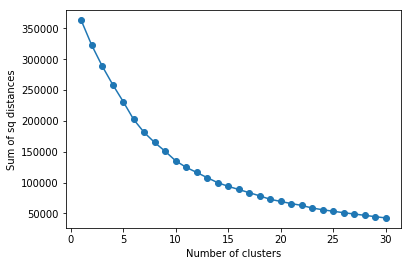

In [61]:
###### Clustering --- Figuring out the  number of clusters
# determinging the number of clusters (up to 30 clusters)
SSE = []
for iClus in range(1,31):
    #print('Number of clusters: %d' % iClus)
    # K-means clustering
    km = KMeans(n_clusters=iClus)  # K-means with a given number of clusters
    km.fit(Rdata)  # fitting the principal components
    SSE.append(km.inertia_) # recording the sum of square distances

# plotting the sum of square distance
plt.plot(np.arange(1,31),SSE,marker = "o")
plt.xlabel('Number of clusters')
plt.ylabel('Sum of sq distances')
plt.show()

Again, the *elbow* in a scree plot is somewhat subjective. In our case, we will go with K=6 as the elbow. 

In [62]:
###### Clustering --- with K=6
km = KMeans(n_clusters=6)  # defining the clustering object
km.fit(Rdata)  # actually fitting the data
y_clus = km.labels_   # clustering info resulting from K-means
y_cent = km.cluster_centers_  # centroid coordinates

We have cluster assignments stored in an array **`y_clus`**. We can plot `y_clus` and the global efficiency over time. 

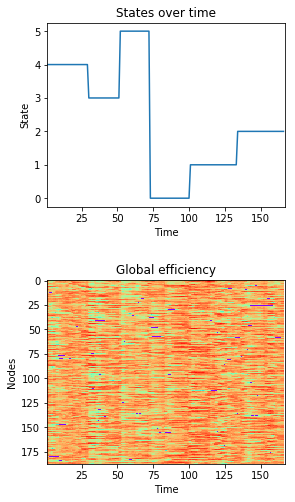

In [64]:
####### plotting cluster over time
plt.figure(figsize=[4,7])
plt.subplot(211)
plt.plot(y_clus)
plt.title('States over time')
plt.xlabel('Time')
plt.ylabel('State')
plt.xlim(1,nTime)

plt.subplot(212)
plt.imshow(EglobMat, cmap=plt.cm.rainbow, aspect='auto')
plt.title('Global efficiency')
plt.xlabel('Time')
plt.ylabel('Nodes')
plt.xlim(1,nTime)

plt.subplots_adjust(left=0.15, right=0.975, top=0.95, bottom=0.075,
                    hspace=0.4)
plt.show()


As you may notice, state changes corresponds to vertical edges in the global efficiency plot.

# 6. Other clustering methods
<hr style="height:1px;border:none" />

We only covered K-means clustering, but that is just one of many clustering algorithms. Each clustering algorithm has strengths and weaknesses depending on how observations are clustered. Here are some examples of clustering algorithms.

<img style="width: 764px; padding: 0px;" src="https://github.com/sathayas/JupyterfMRIFall2019/blob/master/Images/Cluster_ClusterExamples.png?raw=true" alt="Clustering algorithms examples"/>

As you can see, no algorithm works in all settings. Here is a list of different clustering algorithms available in Scikit-learn.

<img style="width: 792px; padding: 0px;" src="https://github.com/sathayas/JupyterfMRIFall2019/blob/master/Images/Cluster_Table.png?raw=true" alt="A table of clustering algorithms"/>

# 7. Classification: k-nearest neighbors (KNN)
<hr style="height:1px;border:none" />

## I want to fit in like everybody else

Now, let's think a simple **classification** problem. Say there are two classes of data points. And you have a new observation to be classified into one of the two classes. 

[`<kNN_2Clusters.py>`](https://github.com/sathayas/fMRIClassFall2019/blob/master/MachineLearning/kNN_2Clusters.py)

In [2]:
%matplotlib inline

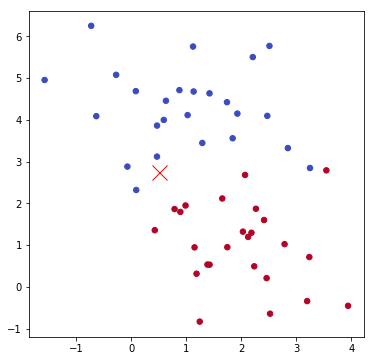

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets.samples_generator import make_blobs
from sklearn.neighbors import KNeighborsClassifier


# producing a toy data set: two clusters, separated
X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=1.0)


# plotting the toy data plus a new observation
x_new = 0.5
y_new = 2.75
plt.figure(figsize=[6,6])
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, s=30)
plt.plot(x_new, y_new, marker='x', c='r', ms=15)
plt.show()

See the new observation (red X). Should this be classified as blue or red? We can classify based on the observations around it.

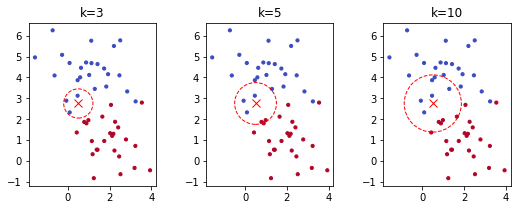

In [4]:
# k nearest neighbors
plt.figure(figsize=[9,3])
plt.subplot(131)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, s=10)
plt.plot(x_new, y_new, marker='x', c='r', ms=8)
circle = plt.Circle((x_new, y_new), radius=0.7, color='r', linewidth=1,
                    ls='--', fill=False)
ax = plt.gca()
ax.add_artist(circle)
ax.set_aspect('equal')
plt.title('k=3')

plt.subplot(132)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, s=10)
plt.plot(x_new, y_new, marker='x', c='r', ms=8)
circle = plt.Circle((x_new, y_new), radius=1.0, color='r', linewidth=1,
                    ls='--', fill=False)
ax = plt.gca()
ax.add_artist(circle)
ax.set_aspect('equal')
plt.title('k=5')

plt.subplot(133)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, s=10)
plt.plot(x_new, y_new, marker='x', c='r', ms=8)
circle = plt.Circle((x_new, y_new), radius=1.37, color='r', linewidth=1,
                    ls='--', fill=False)
ax = plt.gca()
ax.add_artist(circle)
ax.set_aspect('equal')
plt.title('k=10')

plt.show()

These plots show circles encompassing $k$ ($k=3$, $5$, and $10$) nearest neighbors of the new observation. We can classify the new observation as the most abundant class in each of the circles. In this case,
  * $k=3$: Blue=3 $\rightarrow$ Classified as Blue
  * $k=5$: Blue=3, Red=2 $\rightarrow$ Classified as Blue
  * $k=10$: Blue=6, Red=4 $\rightarrow$ Classified as Blue

As you can see, voting among $k$ nearest neighbors enables classification of a new observation without an explicit model. This classification method is known as the **k nearest neighbor** **(kNN** or **KNN)** method. 

The k nearest neighbor method is implemented as the **`KNeighborsClassifier`** transformation object in **`sklearn.neighbors`**. Here is an example.

In [5]:
# k nearest neighbor classifier object
kNN5 = KNeighborsClassifier(5, weights='uniform')
kNN5.fit(X,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

The first parameter of `KNeighborsClassifier` is **`k`**, the number of nearest neighbors to be considered. The parameter **`weights='uniform'`** indicates that all k neighbors count equally in the voting process for classification. This is a **supervised learning** method, so we need to provide both the feature data as well as the target information in the **`.fit()`** method. The `.fit()` method implements the actual learning process from the data to generate a **classifier**, an object that can classify group assignments (or labels) based in input features.

Just for fun, let's plot the decision boundary in this case, showing the boundary between one class vs another, plotted in a 2D space. I have written some custom functions in a file [**`DecisionBoundary.py`**](https://github.com/sathayas/fMRIClassFall2019/blob/master/MachineLearning/DecisionBoundary.py) for that purpose. We can use one of these functions, `plot_contours`, by 
```python
from DecisionBoundary import plot_contours
```
(no `.py` is necessary).

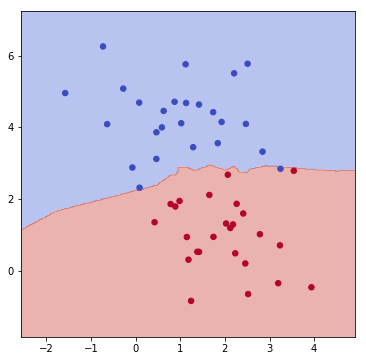

In [6]:
# decision boundary
from DecisionBoundary import plot_contours

plt.figure(figsize=[6,6])
ax = plt.subplot(111)
plot_contours(ax, kNN5, X[:, 0], X[:, 1],
                  cmap=plt.cm.coolwarm, alpha=0.4)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, s=30)
plt.show()

The choice of k influences the decision boundary. Here are examples with different values of k.

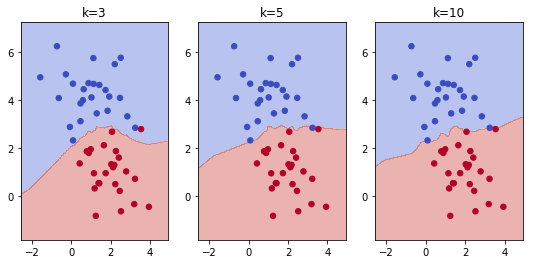

In [7]:
# k nearest neighbor classifier object with different k
kNN3 = KNeighborsClassifier(3, weights='uniform')
kNN3.fit(X,y)

kNN10 = KNeighborsClassifier(10, weights='uniform')
kNN10.fit(X,y)


# decision boundary
plt.figure(figsize=[9,4])
ax = plt.subplot(131)
plot_contours(ax, kNN3, X[:, 0], X[:, 1],
                  cmap=plt.cm.coolwarm, alpha=0.4)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, s=30)
plt.title('k=3')

ax = plt.subplot(132)
plot_contours(ax, kNN5, X[:, 0], X[:, 1],
                  cmap=plt.cm.coolwarm, alpha=0.4)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, s=30)
plt.title('k=5')

ax = plt.subplot(133)
plot_contours(ax, kNN10, X[:, 0], X[:, 1],
                  cmap=plt.cm.coolwarm, alpha=0.4)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, s=30)
plt.title('k=10')

plt.show()

The larger the parameter k is, the smoother the decision boundary becomes. A small k may lead to a problem known as **over-fitting**, where the classifier works very well only for the given training data, and may not be generalized to other data.

## Ties

Depending on the number of classes, the choice of certain values of k may lead to ties, or the number of equal votes in more than one class in a neighborhood. For example, in a 2-class classification problem, if k is an even number, then the number of votes for each class may be k/2 and cannot conclude which class is more appropriate. If such ties happen, then there is no definitive answer as to how the predicted class is chosen.  Here is the warning from the `sklearn` documentation:

>**Warning** Regarding the Nearest Neighbors algorithms, if it is found that two neighbors, neighbor k+1 and k, have identical distances but different labels, the results will depend on the ordering of the training data. 

So a choice of k with potential ties should be avoided.
  * For a 2-class classification, k should not be an even number
  * For a classification into p classes, k should not be a multiple of p.
     * **e.g.**, 3-class classification, then k shouldn't be 3, 6, 9 , 12, ..

## Weighted by the distance

One way to avoid the problem with ties is to give more weights to votes that are closer to the new observation. In other words, k votes are no longer counted as equals, but those closer to the new observation should account more, and vice versa. This can be implemented by setting the parameter **`weights='distance'`** in `KNeighborsClassifier`. However, the use of the distance information may lead to over-fitting. Here are examples of k neighbor classifiers on the same data, but this time with `weights='distance'` in stead of `uniform`.

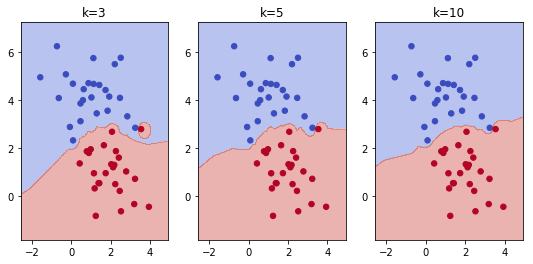

In [8]:
# k nearest neighbor classifier object with different k
# now weighted by the distance
kNN3dist = KNeighborsClassifier(3, weights='distance')
kNN3dist.fit(X,y)

kNN5dist = KNeighborsClassifier(5, weights='distance')
kNN5dist.fit(X,y)

kNN10dist = KNeighborsClassifier(10, weights='distance')
kNN10dist.fit(X,y)


# decision boundary
plt.figure(figsize=[9,4])
ax = plt.subplot(131)
plot_contours(ax, kNN3dist, X[:, 0], X[:, 1],
                  cmap=plt.cm.coolwarm, alpha=0.4)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, s=30)
plt.title('k=3')

ax = plt.subplot(132)
plot_contours(ax, kNN5dist, X[:, 0], X[:, 1],
                  cmap=plt.cm.coolwarm, alpha=0.4)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, s=30)
plt.title('k=5')

ax = plt.subplot(133)
plot_contours(ax, kNN10dist, X[:, 0], X[:, 1],
                  cmap=plt.cm.coolwarm, alpha=0.4)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, s=30)
plt.title('k=10')

plt.show()

You can see that the boundary curves around a few observations near the boundary.

* KNN classifier example: iris data
  * Balance between classes
  * Training and testing data
  * Assessing the results
     * Confusion matrix
     * Precision & recall